---
# Cairo University Faculty of Engineering
## Machine Learning
## Assignment 6

---
Please write your full name here
- **Name** : محمد هاشم عبد الوارث

# Part 1 PCA

In [ ]:
from sklearn.datasets import make_moons, make_blobs
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline


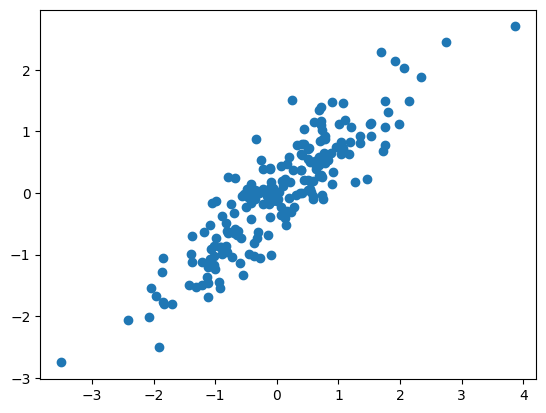

In [ ]:
rng = np.random.RandomState(42)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

## Question 1

Write your own PCA function that will return:
* The sorted eigenvectors of all principal components
* The corresponding eigenvalues
* The transformed data
- Function takes in the data only
    - You can use np.linalg.eig

Note, please make sure that the data is centered before transformation (i.e., the sample
mean subtracted out) but not normalized.

In [ ]:
#### YOUR FUNCTION
def pca(X):
      # Center the data
    mean = np.mean(X, axis=0)
    centered_data = X - mean

    # Calculate the covariance matrix
    cov_matrix = np.cov(centered_data.T)

    # Calculate the eigenvalues and eigenvectors of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

    # Sort the eigenvectors and corresponding eigenvalues in descending order
    idx = eigenvalues.argsort()[::-1]
    sorted_eigenvectors = eigenvectors[idx]
    sorted_eigenvalue = eigenvalues[idx]

    # Transform the data into the new coordinate system
    X_transformed = centered_data @ eigenvectors # matrix multiplication

    return sorted_eigenvectors, sorted_eigenvalue, X_transformed

## Question 2
- Apply your PCA function to the data given above
- print the pca eigenvalues
- plot the transformed data
- plot the PCA vectors over the ORIGINAL data

In [ ]:
## Apply your function
sorted_eigenvectors, sorted_eigenvalues, X_transformed = pca(X)

In [ ]:
print("Eigenvalues are: ", sorted_eigenvalues)

Eigenvalues are:  [1.82927343 0.10246373]


(-4.931196610019512,
 5.101064178684794,
 -0.8771410031890559,
 1.0633000859399695)

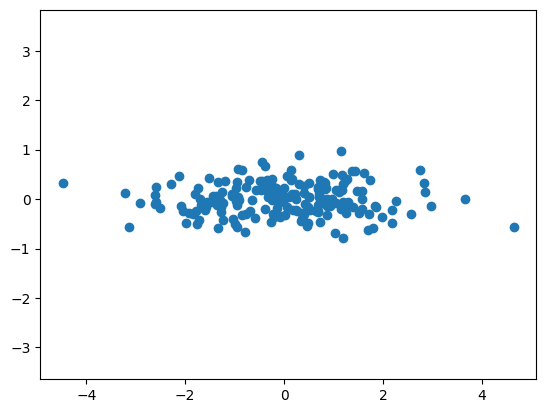

In [ ]:
### Plot transformed data
plt.scatter(X_transformed[:, 0], X_transformed[:, 1])
plt.axis('equal')


[1.82927343 0.10246373] [[ 0.74306799 -0.66921593]
 [ 0.66921593  0.74306799]]


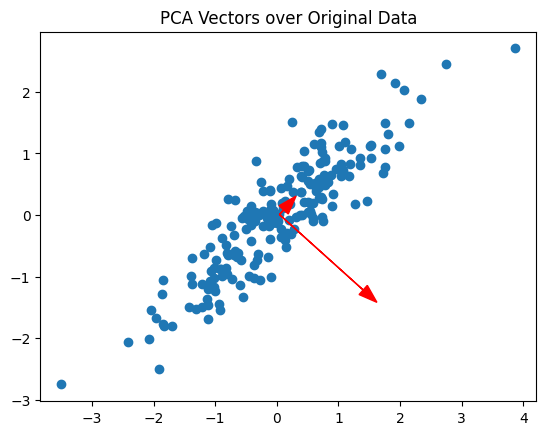

In [ ]:
### Plot eigenvectors over ORIGINAL data
plt.scatter(X[:, 0], X[:, 1])
mean = np.mean(X, axis=0)
print(sorted_eigenvalues,sorted_eigenvectors)
for length, vector in zip(sorted_eigenvectors, sorted_eigenvalues):
    v = vector * length
    plt.arrow(mean[0], mean[1], v[0], v[1], color='red', head_width=0.2, head_length=0.3)
plt.axis('equal')
plt.title("PCA Vectors over Original Data")
plt.show()

## Question 3

- Apply sklearn's PCA function to the same data
- print the pca eigenvalues

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)
print("PCA Eigenvalues:", pca.explained_variance_)
print("manual eigen values:", sorted_eigenvalues)
print("PCA vectors:", pca.components_)
print("manual eigen vectors:", sorted_eigenvectors)







PCA Eigenvalues: [1.82927343 0.10246373]
manual eigen values: [1.82927343 0.10246373]
PCA vectors: [[ 0.74306799  0.66921593]
 [-0.66921593  0.74306799]]
manual eigen vectors: [[ 0.74306799 -0.66921593]
 [ 0.66921593  0.74306799]]


## Question 4
- Appl sklearn PCA using 1 component only
- print shape of transformed data
- plot the transformed data

In [ ]:
pca = PCA(n_components=1)
pca.fit(X)
transformed_data = pca.fit_transform(X)

# Print the shape of transformed data
print("Transformed Data Shape:", transformed_data.shape)




Transformed Data Shape: (200, 1)


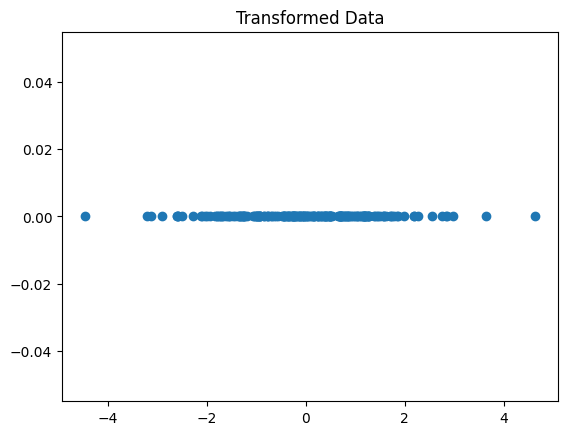

In [ ]:
# Plot the transformed data
plt.scatter(transformed_data[:, 0], np.zeros_like(transformed_data[:, 0])) # 1D data
plt.title("Transformed Data")
plt.show()

# Part 2 SVM

### Use the following function to plot the classification regions

In [ ]:
def plot_class_regions_for_classifier(clf, X, y, X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True):

    numClasses = np.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))
    # np.c_ Translates slice objects to concatenation along the second axis
    # e.g. np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]
    # ravel() Returns a contiguous flattened array.
    # x = np.array([[1, 2, 3], [4, 5, 6]])
    # np.ravel(x) = [1 2 3 4 5 6]
    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)
    plt.figure()
    if plot_decision_regions:
        plt.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    plt.xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    plt.ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        plt.legend(loc=0, handles=legend_handles)

    if (title is not None):
        plt.title(title)
    plt.show()

### Use the following dataset in questions 1, 2, and 3.

In [ ]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)

#### Question 1
Split the data into training and testing datasets (use random_state=42 and 20% of the data for testing)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2, random_state=42)

#### Question 2
1. Train an SVM classifier using linear kernel (use SVC)
2. Plot the classification regions using the training dataset.

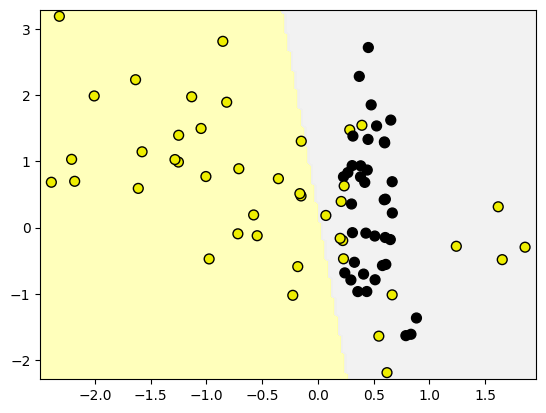

In [ ]:
from sklearn.svm import SVC
SVCmodel = SVC(kernel='linear')
SVCmodel.fit(X_train, y_train)
plot_class_regions_for_classifier(SVCmodel, X_train, y_train)


#### Question 3
1. Train an SVM classifier using linear kernel with C=0.00002.
2. Train another SVM classifier using linear kernel with C=200
3. Plot the classification regions for both cases using the training dataset.
4. Comment on the results.

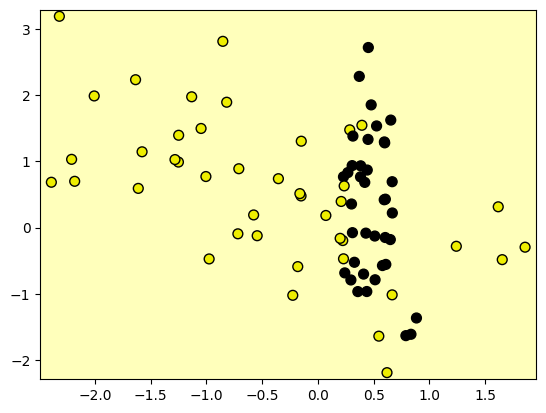

In [ ]:
SVC1 = SVC(kernel='linear', C=0.00002)
SVC1.fit(X_train, y_train)
plot_class_regions_for_classifier(SVC1, X_train, y_train)


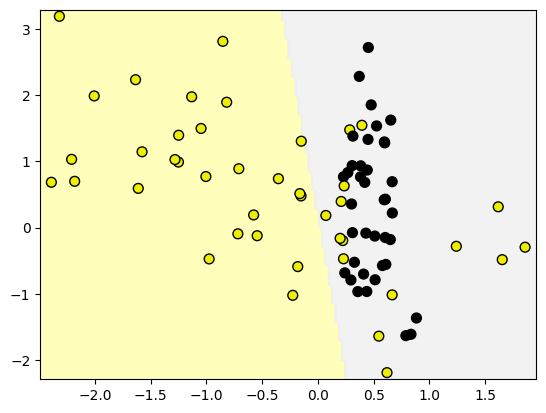

In [ ]:
SVC2 = SVC(kernel='linear', C=200)
SVC2.fit(X_train, y_train)
plot_class_regions_for_classifier(SVC2, X_train, y_train)



# choosing a smaller c meant a simpler decisoion boundary which in our case turned out to be classifying all classes as yellow while choosing a higher c meant a more accurate it still has some misclassification but it splits the data better

### Use the fruits dataset in questions 4, 5, 6.

In [ ]:
import pandas as pd
fruits = pd.read_table('Mohamed Abdelwareth - fruit_data_with_colors.txt')
feature_names_fruits = ['height', 'width', 'mass', 'color_score']

#### Question 4
1. Split the data by columns into X_fruits and y_fruits where X_fruits is the data records and y_fruits is the labels.
2. Using only the **'height'** and **'width'** features, split the data into training and testing using random_state=42, and 20% of the data for testing.
3. Using **sklearn LinearSVC**, train a linear svm using random_state=42, C=10

In [ ]:
# Split the data into features and labels
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']


In [ ]:
from sklearn.svm import LinearSVC
X_fruits = X_fruits[['height', 'width']]
X_train, X_test, y_train, y_test = train_test_split(X_fruits, y_fruits, test_size=0.2, random_state=42)

svcmodel = LinearSVC(random_state=42, C=10)
svcmodel.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=10, random_state=42)

#### Question 5
For the previous model from question 4.
1. How many SVM models have been trained? and Why?

four models have been trained because we have 4 fruits classes and the svm model uses a one vs all approach to classify each class binary vs the rest
2. Print the models' coefficients and intercepts.

In [ ]:
print(y_fruits.unique()) # get no.classes
# Print the model coefficients and intercept
print("Model Coefficients: ", svcmodel.coef_)
print("Model Intercept: ", svcmodel.intercept_)

[1 2 3 4]
Model Coefficients:  [[-0.22459715  0.76048347]
 [-1.70338354  1.18717003]
 [-0.0062549   0.3183943 ]
 [ 1.14746624 -1.71656282]]
Model Intercept:  [-3.42751628  1.46849592 -3.01719598  1.66954999]


#### Question 6
Plot the classification boundary of each svm on a scatter plot of the training data.

In [ ]:
#plot_class_regions_for_classifier(svcmodel, X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


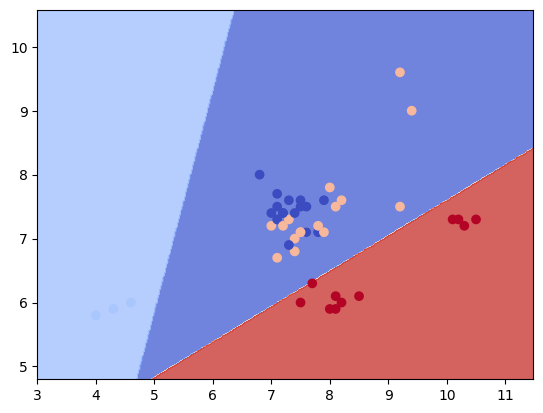

In [ ]:
X_train=np.array(X_train)
h = .02
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = svcmodel.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)



plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


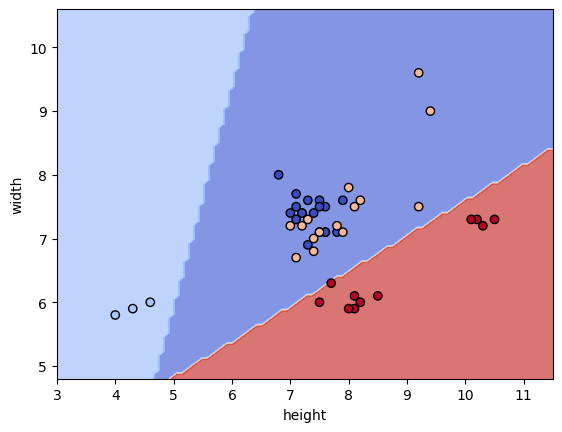

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier




# Plotting the tree boundaries
disp = DecisionBoundaryDisplay.from_estimator(svcmodel,
                                              X_train,
                                              response_method="predict",
                                              xlabel='height', ylabel='width',
                                              alpha=0.7,
                                              cmap=plt.cm.coolwarm)

# Plotting the data points
disp.ax_.scatter(X_train[:, 0], X_train[:, 1],
                 c=y_train, edgecolor="k",
                 cmap=plt.cm.coolwarm)

In [ ]:
from sklearn.datasets import load_breast_cancer
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

#### Question 7
1. Split the dataset into training and testing datasets, use random_state = 42, and 20% of the data for testing.
2. Use GridSearchCV to find the best C value for and SVM  (SVC) classifier with rbf kernel and print the best C value. *use:*  
```python
parameters = {'kernel' : ('poly', 'rbf'), 'C':[0.01, 0.1, 0.5, 1, 10]}
```
3. Print the best parameters resulted from your grid search.

In [ ]:
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, test_size=0.2, random_state=42)

parameters = {'kernel': ('poly', 'rbf'), 'C': [0.01, 0.1, 0.5, 1, 10]}
svc = SVC()
clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(X_train, y_train)

# Print the best C value
print("Best parameters :", clf.best_params_)

Best parameters : {'C': 10, 'kernel': 'poly'}


#### Question 8
Train an SVM model using the best parameters resulted from question 7, then calculate and print the training and testing accuracy.

In [ ]:
from sklearn.metrics import accuracy_score
best_params = SVC(kernel='poly', C=10)
best_params.fit(X_train, y_train)

# Calculate and print the training and testing accuracy
train_acc = accuracy_score(y_train, best_params.predict(X_train))
test_acc = accuracy_score(y_test, best_params.predict(X_test))
print('Accuracy of best SVC on training set: {:.2f}'
     .format(train_acc))
print('Accuracy of best SVC on test set: {:.2f}'
     .format(test_acc))

Accuracy of best SVC on training set: 0.92
Accuracy of best SVC on test set: 0.93


#### Question 9
Improve the previous results from question 8.

**Hint:** Don't change the model, instead, make some preprocessing on the data.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
# Apply feature scaling to the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)





In [ ]:
from sklearn.metrics import accuracy_score
best_params = SVC(kernel='poly', C=10)
best_params.fit(X_train_scaled, y_train)

# Calculate and print the training and testing accuracy
train_acc = accuracy_score(y_train, best_params.predict(X_train_scaled))
test_acc = accuracy_score(y_test, best_params.predict(X_test_scaled))
print('Accuracy of best SVC on training set: {:.2f}'
     .format(train_acc))
print('Accuracy of best SVC on test set: {:.2f}'
     .format(test_acc))


Accuracy of best SVC on training set: 0.97
Accuracy of best SVC on test set: 0.96
